# **3 自定义layers**

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os, sys, time
import tensorflow as tf
from tensorflow import keras

## **3.1 加载加利福利亚数据集**

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()

In [4]:
from sklearn.model_selection import train_test_split
X_train_all, X_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_val_scaled = std_scaler.transform(X_val)
X_test_scaled = std_scaler.transform(X_test)

## **3.2 使用子类创建层**

In [9]:
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        """构建需要的参数"""
        self.kernel = self.add_weight(name='kernel',
                                      shape = (input_shape[-1], self.units),
                                      initializer='uniform',
                                      trainable = True)
        self.bias = self.add_weight(name='bias',
                                    shape = (self.units),
                                    initializer = 'zeros',
                                    trainable = True)
        super(CustomizedDenseLayer, self).build(input_shape)
    def call(self, x):
        """前向计算"""
        return self.activation(x @ self.kernel + self.bias)

In [10]:
model = keras.models.Sequential()
model.add(CustomizedDenseLayer(128, activation='relu', input_shape=X_train.shape[1:]))
model.add(CustomizedDenseLayer(1, activation='relu'))
model.summary()
model.compile(loss='mse', optimizer='Adam')

callbacks = [keras.callbacks.EarlyStopping(min_delta=1e-3, patience=5),]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer (Cust (None, 128)               1152      
_________________________________________________________________
customized_dense_layer_1 (Cu (None, 1)                 129       
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train_scaled, y_train, batch_size=128, epochs=20, validation_data=(X_val_scaled, y_val), callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 102us/sample - loss: 3.3319 - val_loss: 0.9136
Epoch 2/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.7788 - val_loss: 0.6207
Epoch 3/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5935 - val_loss: 0.4994
Epoch 4/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4907 - val_loss: 0.4426
Epoch 5/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4479 - val_loss: 0.4174
Epoch 6/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4289 - val_loss: 0.4044
Epoch 7/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4150 - val_loss: 0.3945
Epoch 8/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4067 - val_loss: 0.3921
Epoch 9/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3999 - val_

In [12]:
def plot_learing_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5)) 
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

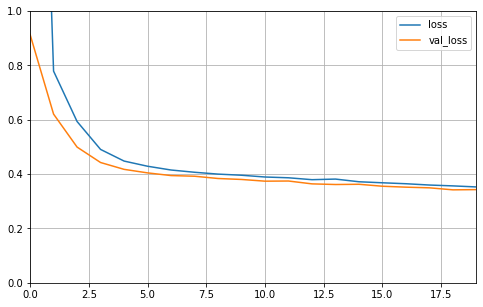

In [13]:
plot_learing_curve(history)

## **3.3 使用Lambda创建层**

> lambda适合没有参数的层

In [16]:
# tf.nn.softplus : log(1 + e^x)
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
print(customized_softplus([10., 5., 2., 1., -10.]))

tf.Tensor([1.0000046e+01 5.0067153e+00 2.1269281e+00 1.3132616e+00 4.5417706e-05], shape=(5,), dtype=float32)


In [18]:
model = keras.models.Sequential()
model.add(CustomizedDenseLayer(128, activation='relu', input_shape=X_train.shape[1:]))
model.add(CustomizedDenseLayer(1, activation='relu'))
model.add(customized_softplus)
model.summary()
model.compile(loss='mse', optimizer='Adam')

callbacks = [keras.callbacks.EarlyStopping(min_delta=1e-3, patience=5),]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_2 (Cu (None, 128)               1152      
_________________________________________________________________
customized_dense_layer_3 (Cu (None, 1)                 129       
_________________________________________________________________
lambda_2 (Lambda)            (None, 1)                 0         
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train_scaled, y_train, batch_size=128, epochs=20, validation_data=(X_val_scaled, y_val), callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 56us/sample - loss: 2.1691 - val_loss: 0.7425
Epoch 2/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.6784 - val_loss: 0.5330
Epoch 3/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5122 - val_loss: 0.4396
Epoch 4/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4362 - val_loss: 0.3998
Epoch 5/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4136 - val_loss: 0.3833
Epoch 6/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3963 - val_loss: 0.3808
Epoch 7/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3881 - val_loss: 0.3734
Epoch 8/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3824 - val_loss: 0.3654
Epoch 9/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3781 - val_l